In [51]:
# import necessary libraries Numpy, Pandas, Matplotlib, Seaborn, Statsmodels and sklearn library in python
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [52]:
# Data Preperation
# The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts
# The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD)

disease_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Heart Disease Prediction\framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [53]:
# removes any rows with missing values (NaN) from the dataframe
disease_df.dropna(axis = 0, inplace = True) 
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# prints the count of unique values in the TenYearCHD column 
# indicates whether a patient has heart disease

print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [55]:
# Splitting the Dataset into test and train sets

X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_392\2663101798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


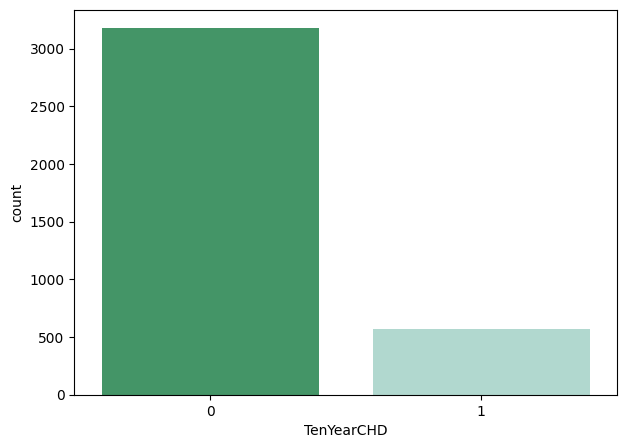

In [ ]:
# Exploratory Data Analysis of Heart Disease Dataset

plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()

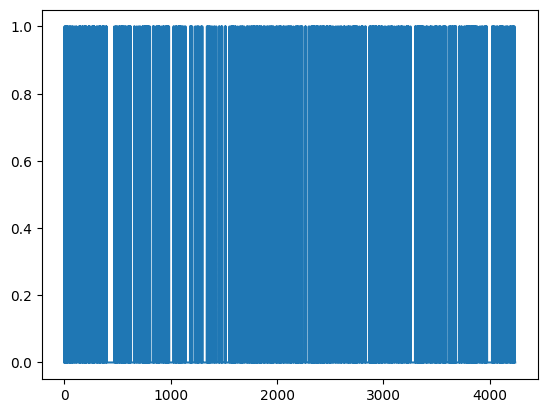

In [58]:
# Counting number of patients affected by CHD 
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

# Blue bars indicates the absence of heart disease
# White spaces indicates the presence of heart disease

In [59]:
# Fitting logistic regression model for heart disease prediction

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [60]:
# Evaluating logistic regression model

from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



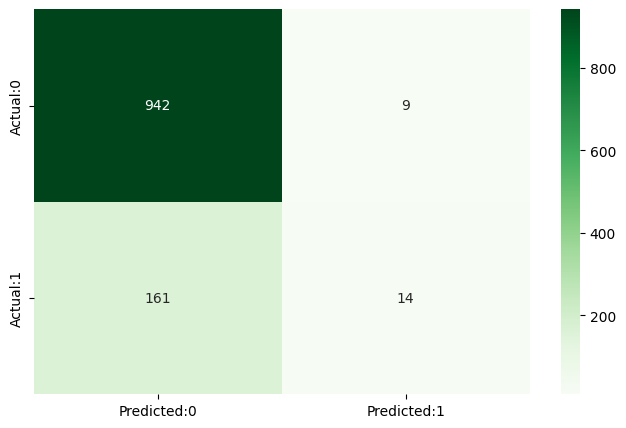

In [61]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [62]:
# The model performs well at predicting no heart disease (class 0) but poorly predicts heart disease (class 1) result in an imbalanced classification performance
# To enhance model performance techniques such as class balancing, adjust thresholds or experiment with different algorithms help to 
# achieve better results to correctly identify individuals with heart disease

# Checks classification again
print(disease_df['TenYearCHD'].value_counts(normalize=True))

# The output "0    0.847507  1    0.152493 indicates the dataset is imbalanced


TenYearCHD
0    0.847507
1    0.152493
Name: proportion, dtype: float64


In [46]:
# apply class balancing techniques

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

logreg.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

logreg = LogisticRegression(solver='saga', max_iter=1000)

logreg.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=1000, solver='saga')

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       951
           1       0.41      0.27      0.32       175

    accuracy                           0.83      1126
   macro avg       0.64      0.60      0.61      1126
weighted avg       0.80      0.83      0.81      1126



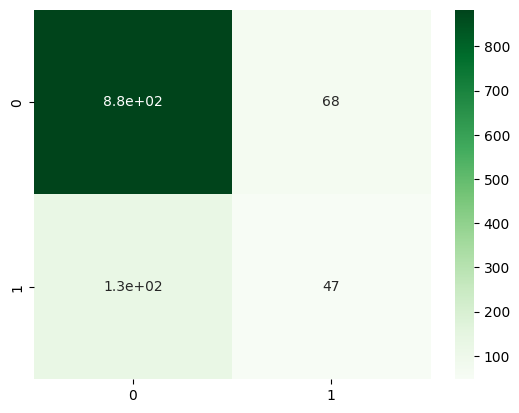

In [67]:
# adjust decision threshlod

y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_thresh = (y_prob >= 0.3).astype(int)  # Lowering threshold to 0.3

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_thresh, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_thresh), annot=True, cmap='Greens')
plt.show()


In [50]:
# try with different algorithms 
# sample example with random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       630
           1       0.90      0.87      0.89       642

    accuracy                           0.89      1272
   macro avg       0.89      0.89      0.89      1272
weighted avg       0.89      0.89      0.89      1272

